In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Data Preprocessing

In [ ]:
df_train=pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
df_test=pd.read_csv('test.csv')
pd.set_option('display.max_columns', None)
df_test=df_test.drop('id',axis=1)
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


There is no class label in the test dataset. So as of now only using the train dataset for both training and testing

In [ ]:
df_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

There are no text columns in the dataset

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


By looking at the data description we see that the data is not normalized

In [ ]:
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no Nulls, N/A, None values in the dataset

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Checking for outliers using box plot

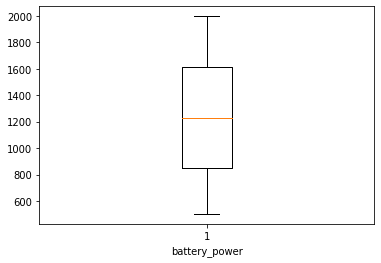

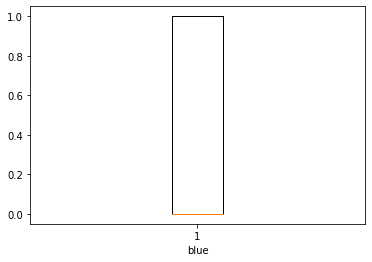

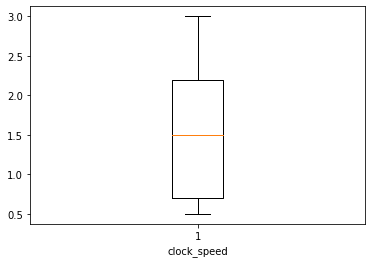

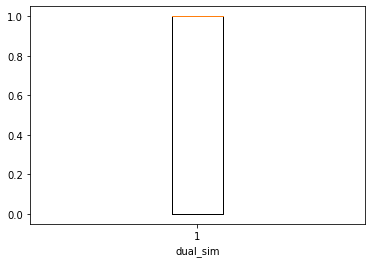

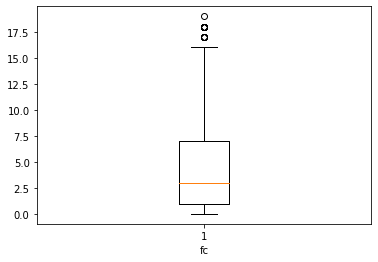

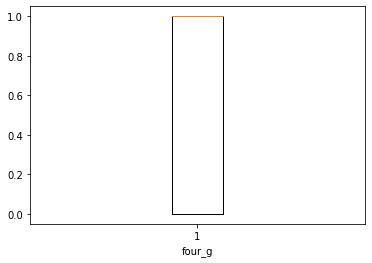

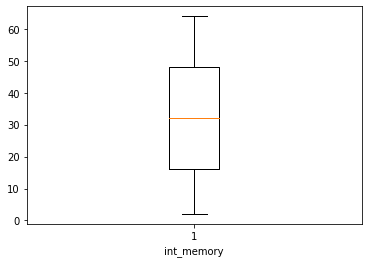

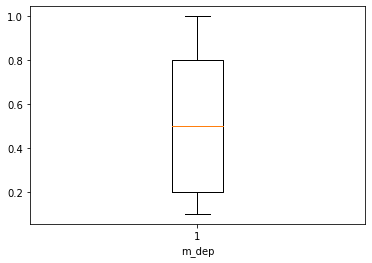

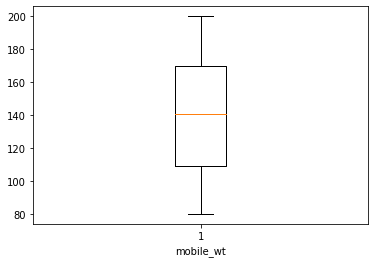

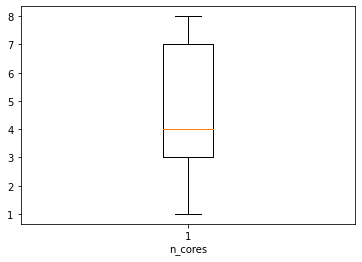

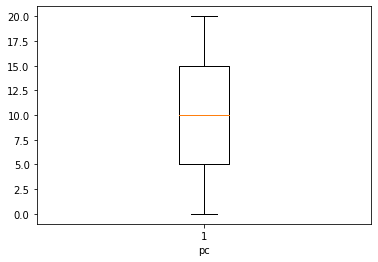

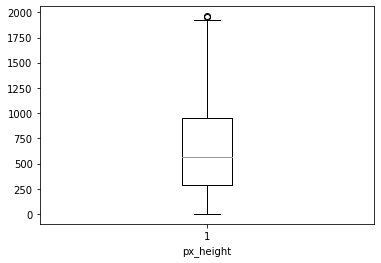

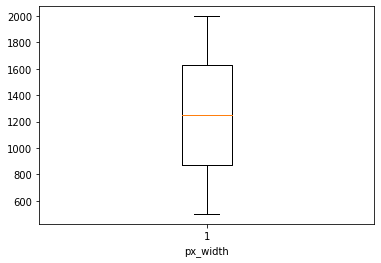

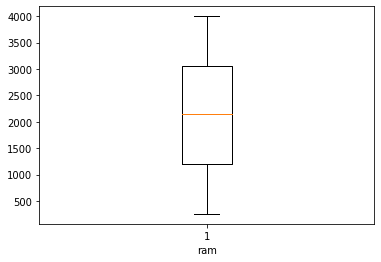

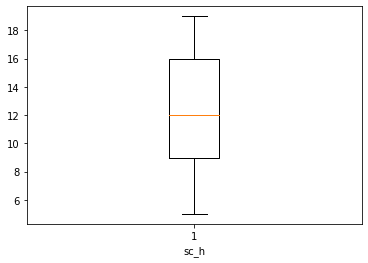

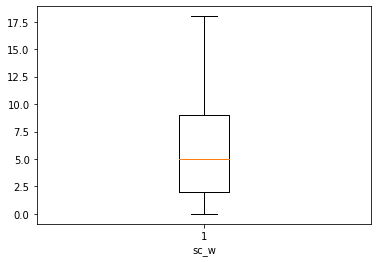

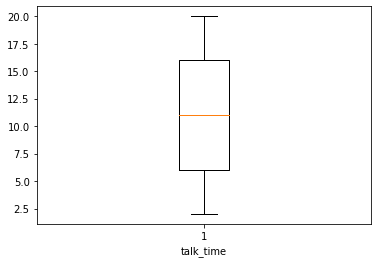

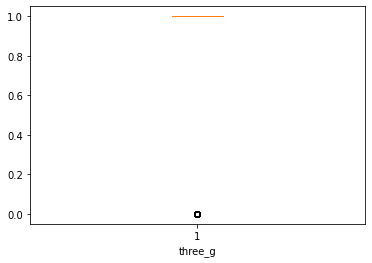

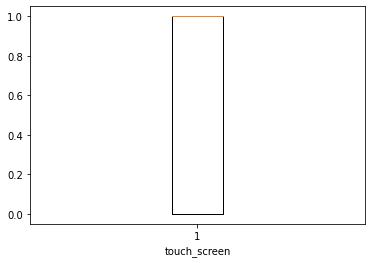

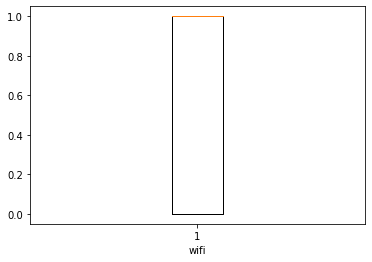

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in df_train.drop('price_range',axis=1).columns:
  plt.boxplot(df_train[i])
  plt.xlabel(i)
  plt.show()

We can see that in the column fc there are outliers

In [ ]:
df_train.three_g.value_counts()

1    1523
0     477
Name: three_g, dtype: int64

In [ ]:
df_train[df_train['fc']>16]['fc'].count()

18

removing the outliers

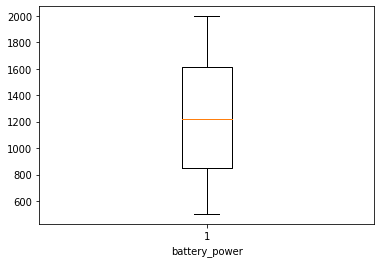

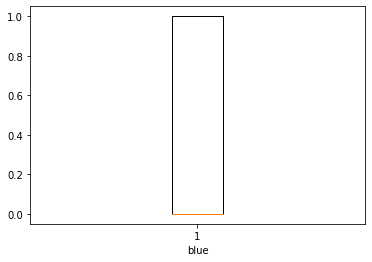

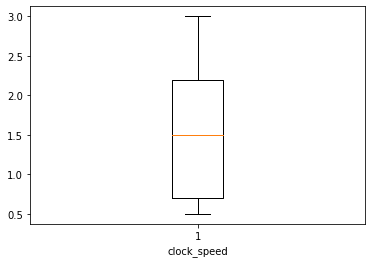

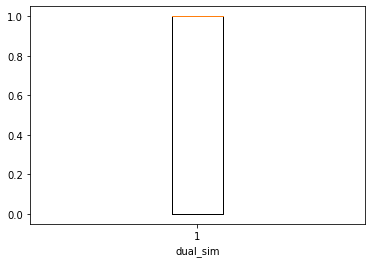

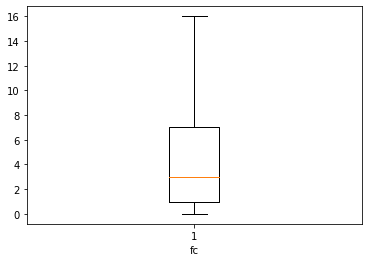

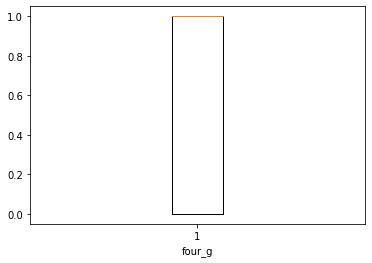

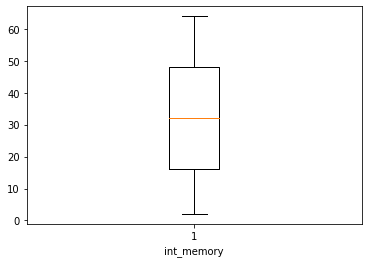

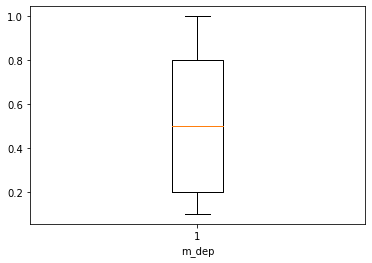

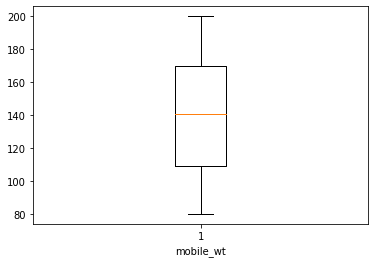

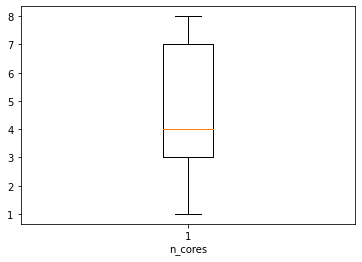

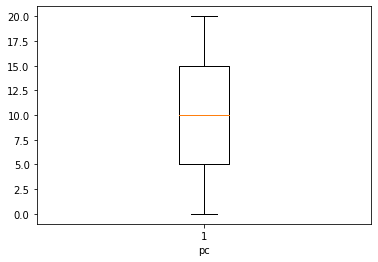

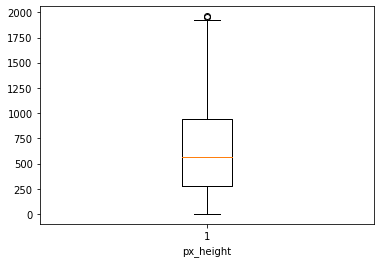

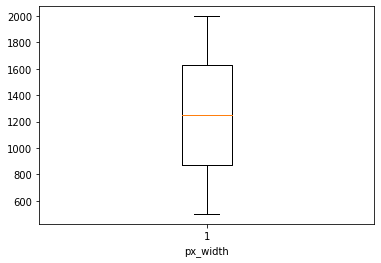

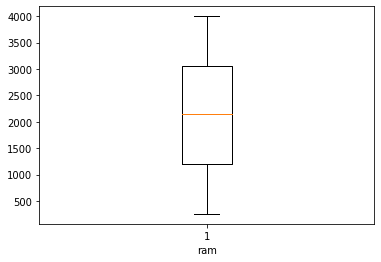

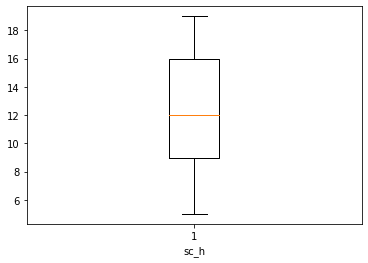

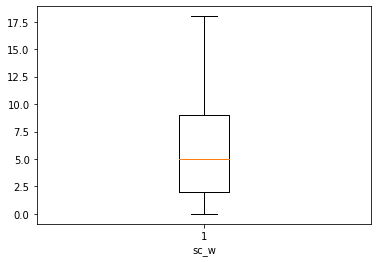

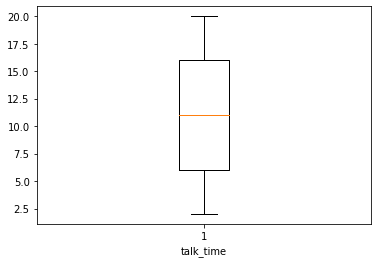

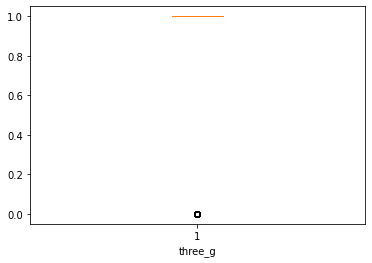

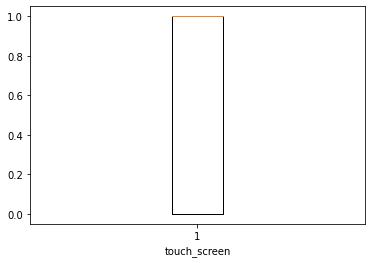

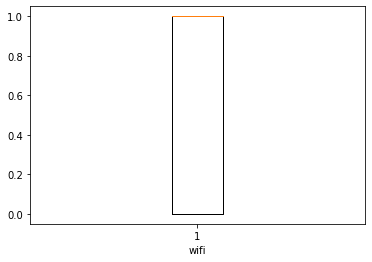

In [ ]:
df_train=df_train[df_train['fc']<=16]
for i in df_train.drop('price_range',axis=1).columns:
  plt.boxplot(df_train[i])
  plt.xlabel(i)
  plt.show()

We can see that we got rid the outliers in the dataset

In [ ]:
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


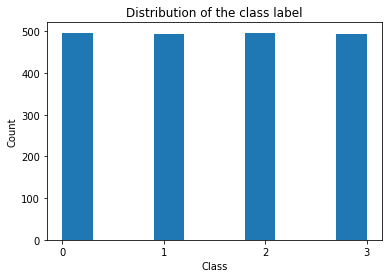

In [ ]:
plt.hist(df_train.price_range)
plt.title("Distribution of the class label")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(np.arange(4))
plt.show()

We can see that the class label is pretty balanced as all classes are having equal number of records

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

Normalizing the data

In [ ]:
df_n=pd.DataFrame()
for i in df_train.drop('price_range',axis=1).columns:
  df_n[[i]]=sc.fit_transform(df_train[[i]])

In [ ]:
df_n.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [ ]:
df_n

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.898086,-0.989960,0.831534,-1.018331,-0.765107,-1.043319,-1.383613,0.338696,1.353122,-1.104152,-1.300304,-1.409674,-1.144666,0.390872,-0.789168,0.279546,1.464848,-1.783658,-1.003032,0.988961
1,-0.490577,1.010142,-1.249400,0.981999,-1.005126,0.958480,1.155164,0.685260,-0.116901,-0.667514,-0.636076,0.594412,1.707842,0.466520,1.111355,-0.637393,-0.734643,0.560646,0.996977,-1.011162
2,-1.533254,1.010142,-1.249400,0.981999,-0.525088,0.958480,0.492874,1.378389,0.137526,0.205762,-0.636076,1.405104,1.078068,0.440689,-0.314037,-0.866627,-0.368062,0.560646,0.996977,-1.011162
3,-1.414872,1.010142,1.198757,-1.018331,-1.005126,-1.043319,-1.218040,1.031824,-0.258250,0.642400,-0.137906,1.298672,1.240142,0.593831,0.873790,0.508781,-0.001480,0.560646,-1.003032,-1.011162
4,1.330693,1.010142,-0.392545,-1.018331,2.115125,0.958480,0.658447,0.338696,0.024447,-1.104152,0.692378,1.280556,-0.088868,-0.658980,-1.026733,-0.866627,0.731684,0.560646,0.996977,-1.011162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,-1.007362,1.010142,-1.249400,0.981999,-1.005126,0.958480,-1.659567,1.031824,-0.964991,0.642400,0.692378,1.312259,1.480938,-1.344429,0.161094,-0.408158,1.464848,0.560646,0.996977,-1.011162
1978,1.658522,1.010142,1.321165,0.981999,-1.005126,-1.043319,0.382493,-1.047561,1.324852,-0.230876,-1.134247,0.617057,1.654589,-0.086082,-0.314037,0.967250,0.914975,0.560646,0.996977,0.988961
1979,1.535586,-0.989960,-0.759769,0.981999,-0.765107,0.958480,0.216920,0.685260,-0.908452,1.515676,-1.134247,0.510625,0.883578,0.859523,-0.789168,-1.095862,-1.101225,0.560646,0.996977,-1.011162
1980,0.627227,-0.989960,-0.759769,-1.018331,-0.045049,0.958480,0.768828,-1.394126,0.137526,0.205762,-0.802133,-0.694091,-1.343786,-1.158998,1.348920,0.967250,1.464848,0.560646,0.996977,0.988961


In [ ]:
df_train['price_range'].isna().sum()

0

In [ ]:
df_n.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1982.0,-8.603948e-17,1.000252,-1.674403,-0.879304,-0.028430,0.857732,1.733649
blue,1982.0,5.377468e-18,1.000252,-0.989960,-0.989960,-0.989960,1.010142,1.010142
clock_speed,1982.0,1.088937e-16,1.000252,-1.249400,-1.004584,-0.025322,0.831534,1.810797
dual_sim,1982.0,1.416067e-16,1.000252,-1.018331,-1.018331,0.981999,0.981999,0.981999
fc,1982.0,-5.377468e-17,1.000252,-1.005126,-0.765107,-0.285068,0.675009,2.835183
four_g,1982.0,1.111343e-16,1.000252,-1.043319,-1.043319,0.958480,0.958480,0.958480
int_memory,1982.0,-5.377468e-17,1.000252,-1.659567,-0.886895,-0.003843,0.879210,1.762263
m_dep,1982.0,-1.640128e-16,1.000252,-1.394126,-1.047561,-0.007869,1.031824,1.724953
mobile_wt,1982.0,-2.509485e-17,1.000252,-1.700003,-0.880182,0.024447,0.844268,1.692358
n_cores,1982.0,-1.998626e-16,1.000252,-1.540790,-0.667514,-0.230876,1.079038,1.515676


In [ ]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1982 entries, 0 to 1981
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1982 non-null   float64
 1   blue           1982 non-null   float64
 2   clock_speed    1982 non-null   float64
 3   dual_sim       1982 non-null   float64
 4   fc             1982 non-null   float64
 5   four_g         1982 non-null   float64
 6   int_memory     1982 non-null   float64
 7   m_dep          1982 non-null   float64
 8   mobile_wt      1982 non-null   float64
 9   n_cores        1982 non-null   float64
 10  pc             1982 non-null   float64
 11  px_height      1982 non-null   float64
 12  px_width       1982 non-null   float64
 13  ram            1982 non-null   float64
 14  sc_h           1982 non-null   float64
 15  sc_w           1982 non-null   float64
 16  talk_time      1982 non-null   float64
 17  three_g        1982 non-null   float64
 18  touch_sc

In [ ]:
df_train.blue.value_counts()
print('\n 1 there is bluetooth=',df_train.blue.value_counts()[0],"\n",
      '0 there is not bluetooth=',df_train.blue.value_counts()[1])


 1 there is bluetooth= 1001 
 0 there is not bluetooth= 981


In [ ]:
df_train.dual_sim.value_counts()
print('\n 1 there is dual sim=',df_train.dual_sim.value_counts()[0],"\n",
      '0 there is not dual sim=',df_train.dual_sim.value_counts()[1])


 1 there is dual sim= 973 
 0 there is not dual sim= 1009


In [ ]:
df_train.three_g.value_counts()
print('\n 0 there is not 3G =',df_train.three_g.value_counts()[0],"\n",
      '1 there is 3G=',df_train.three_g.value_counts()[1])


 0 there is not 3G = 474 
 1 there is 3G= 1508


In [ ]:
df_train.wifi.value_counts()
print('\n 0 there is no wifi =',df_train.wifi.value_counts()[0],"\n",
      '1 there is wifi =',df_train.wifi.value_counts()[1])


 0 there is no wifi = 980 
 1 there is wifi = 1002


#Data Visualization

In [ ]:
df_n['price_range']=df_train['price_range'].values

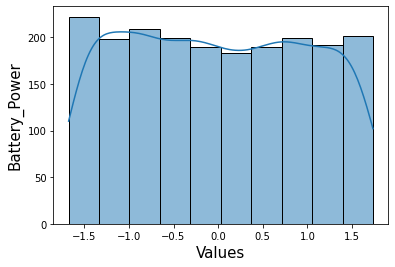

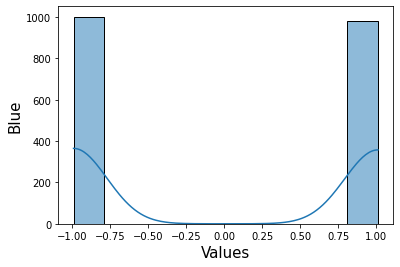

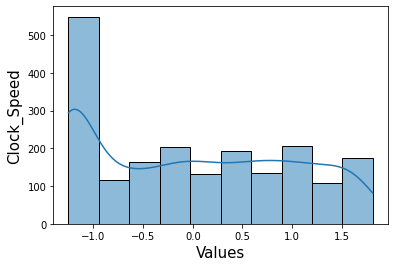

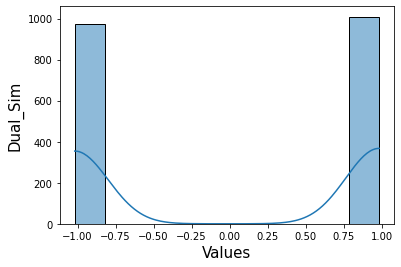

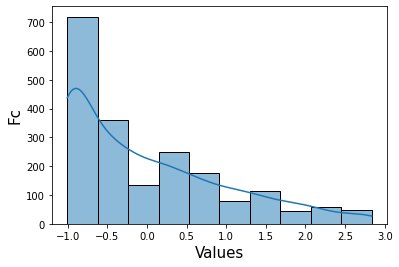

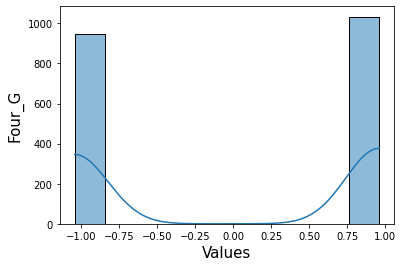

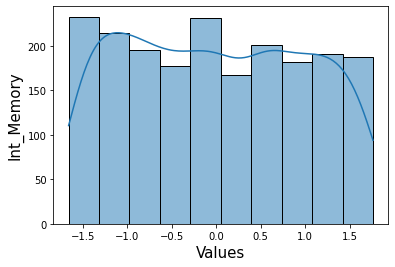

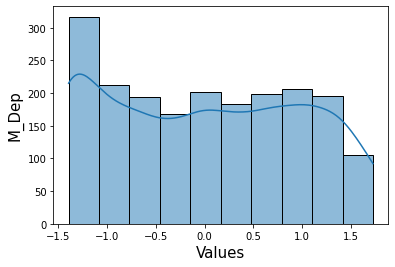

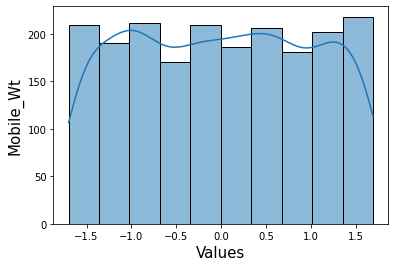

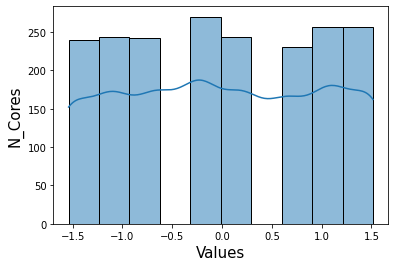

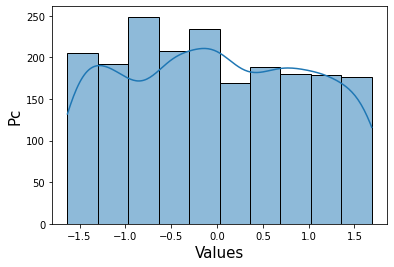

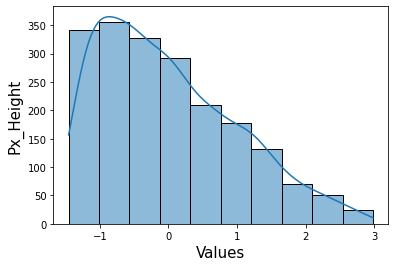

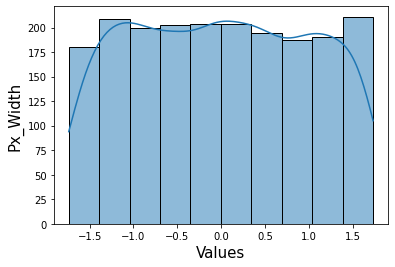

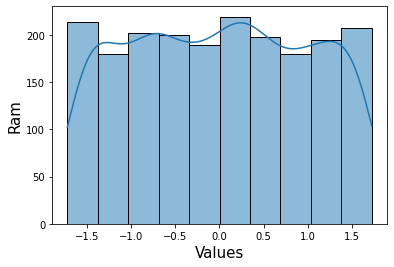

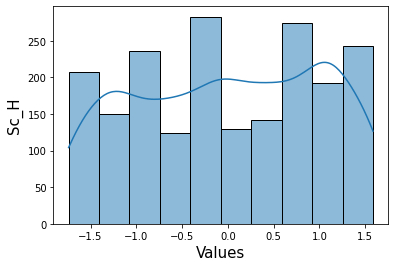

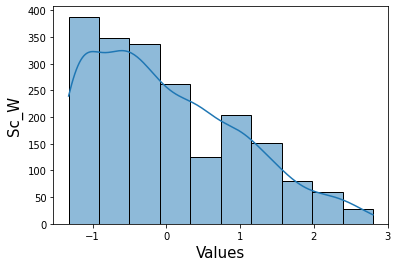

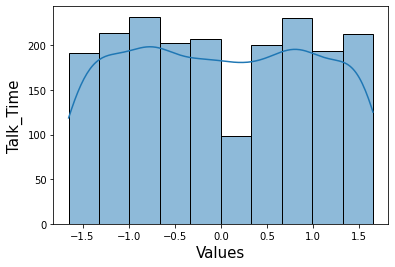

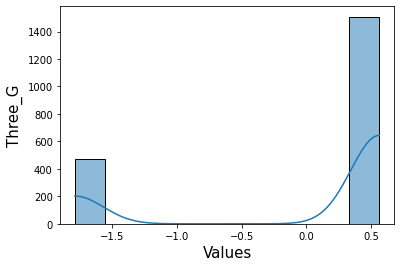

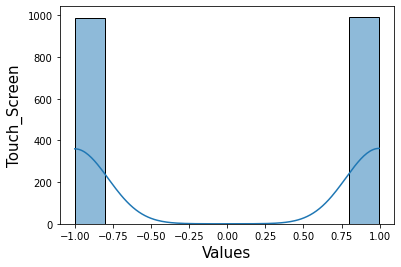

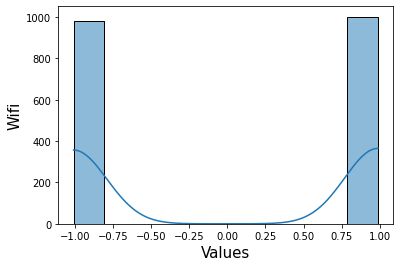

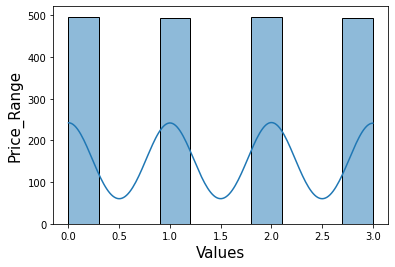

In [ ]:
#checking the distribution of all the features in the dataset
for col in df_n.columns:
    sns.histplot(df_n[col], kde=True, bins=10)
    
    plt.ylabel(col.title(),fontsize=15)
    plt.xlabel("Values",fontsize=15)
    plt.show()

From this plot we can understand the distribution of the dataset and the kernel density function

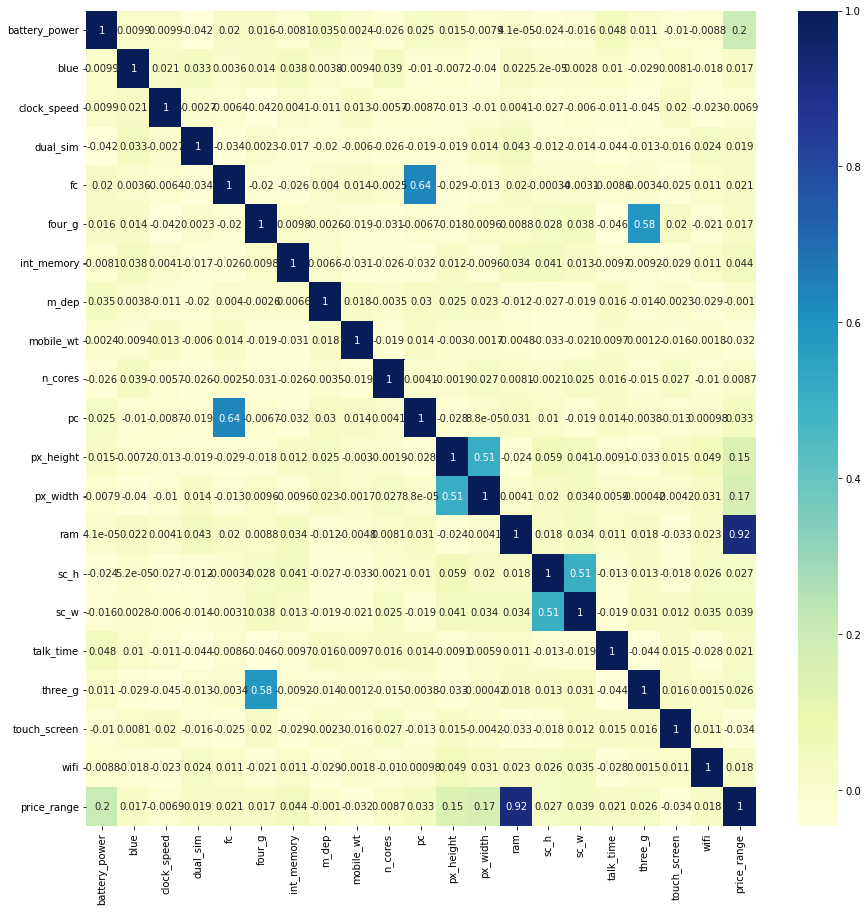

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_n.corr(), annot=True, cmap='YlGnBu')
plt.show()

From the above correlation plot we can understand that the colums pc and fc are moderately correlated. And the columns four_g and three_g are moderately correlated as well. 

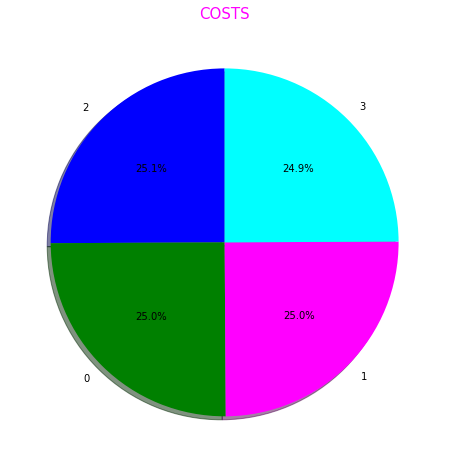

In [ ]:
labels = df_n["price_range"].value_counts().index
sizes = df_n["price_range"].value_counts()
colors = ['blue','green','magenta','cyan',"red","yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'magenta',fontsize = 15)
plt.show()

From the above plot we can see that the class label column is pretty balanced as the classes are spread throughout the dataset equally

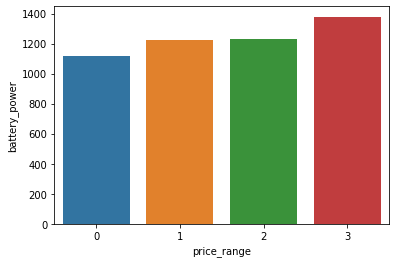

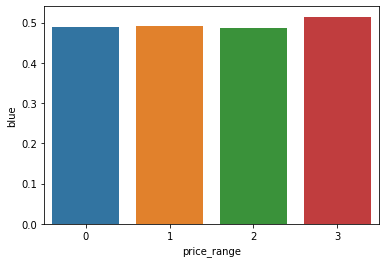

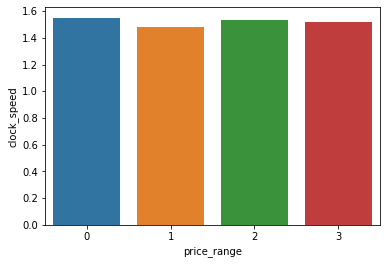

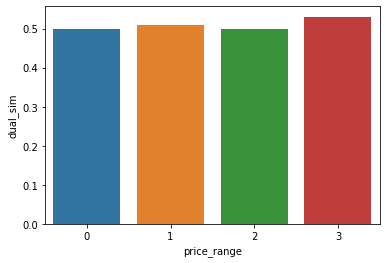

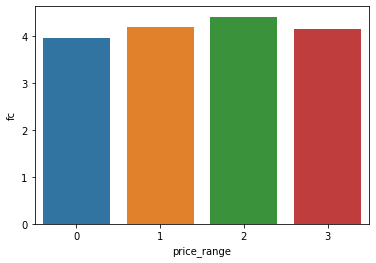

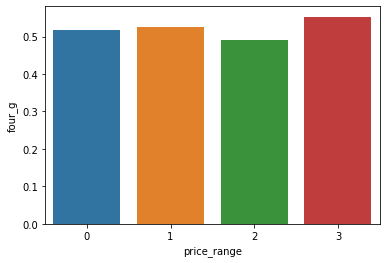

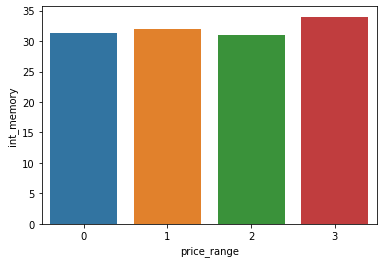

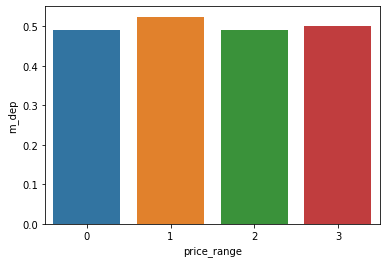

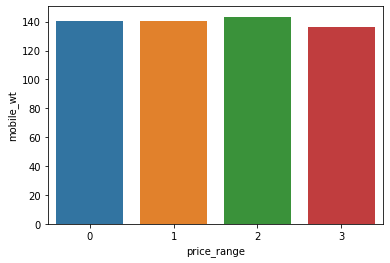

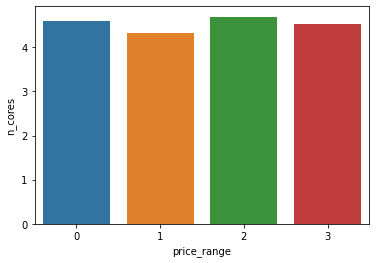

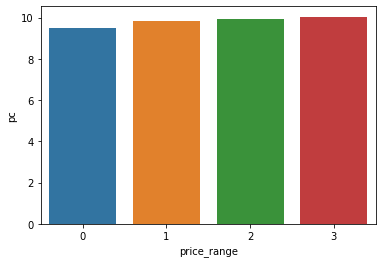

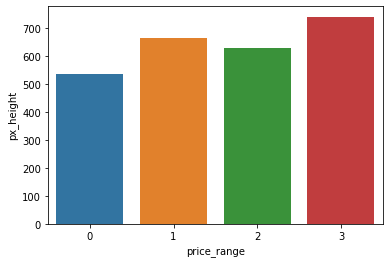

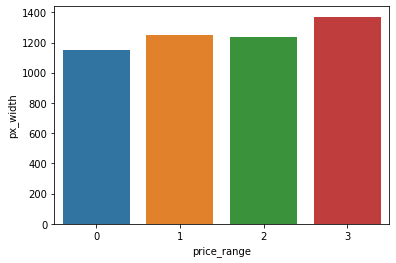

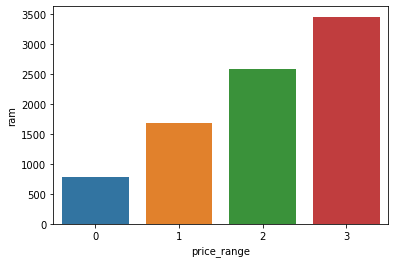

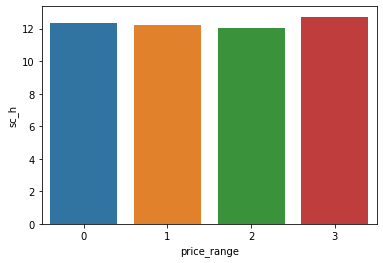

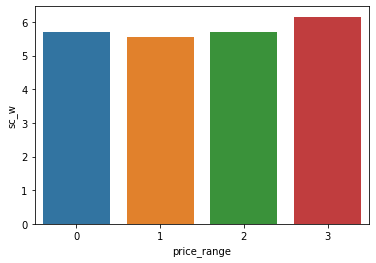

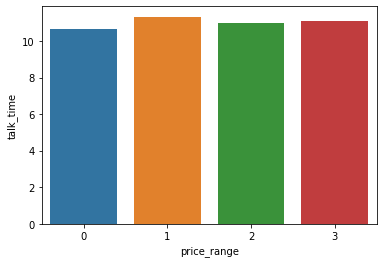

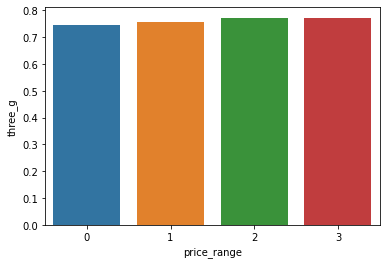

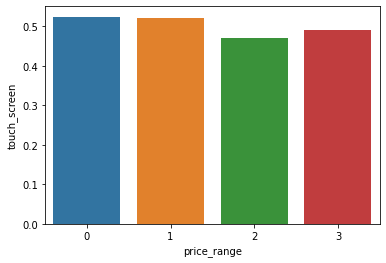

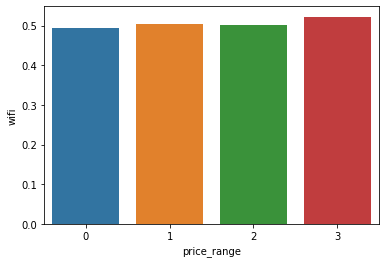

In [ ]:
for colum in df_train.columns:
    if colum !='price_range':
        x=df_train.groupby('price_range')[colum].mean().to_frame().reset_index()

        sns.barplot(y=colum,x='price_range',data = x)
        plt.show()

The above graph is the barplot with the grouped mean of columns with respect to class label. And we can infer from the graph that for the ram column the high values are from the higher price class and low values are in the lower price class. And the same happens with the battery power column too.

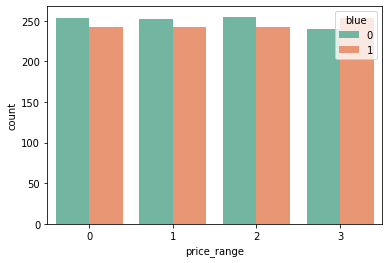

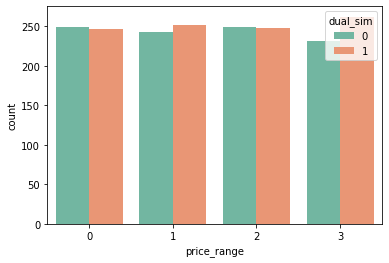

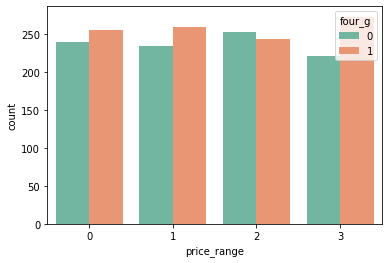

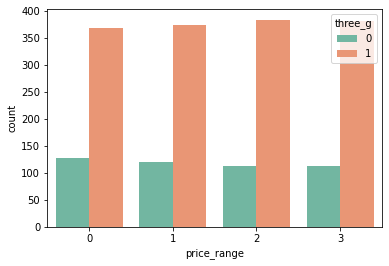

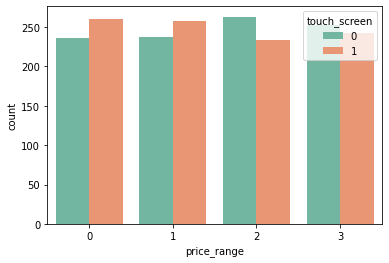

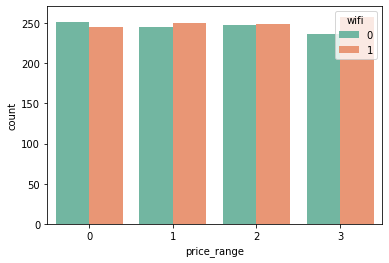

In [ ]:
for col in df_train.columns:
    if len(df_train[col].unique()) ==2:
        sns.countplot(x='price_range',
                     data=df_train,
                     hue=col,
                     palette='Set2' 
                     )
        plt.show()

The above graph is a countplot of colums with 2 values w.r.t class label. And we can understand that most of phones are having 3G connectivity irrespective of thier price. And as the price is increasing the number of phones having 4G are decreasing little bit. 

# Problem Statement

The problem I am trying to solve here is classification, my class label is price_range and my columns are 'battery_power', 'blue', 'clock_speed', 'dual_sim','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time','touch_screen', 'wifi'. My evaluation metrics are Accuracy score and F1 score

#Feature Extraction

Frist checking the performance and whole dataset and will remove some of the colums and check again

In [ ]:
df_n=df_n.reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_n.drop('price_range',axis=1),df_n["price_range"],test_size=0.3,random_state=10)


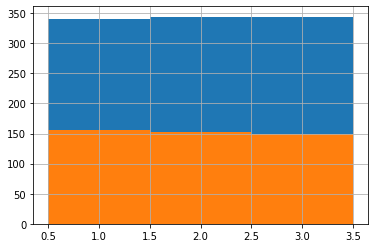

In [ ]:
#Review the following histograms and see how data is split.
Y_train.hist(bins=[0.5,1.5,2.5,3.5])
Y_test.hist(bins=[0.5,1.5,2.5,3.5])

The data looks pretty balanced

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,Y_train)
Y_test_Predicted=model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LGC result:
Accuracy:  0.957983193277311
f1_score:  0.9578576235845866
Precision:  0.9581308818480282
Recall:  0.957983193277311


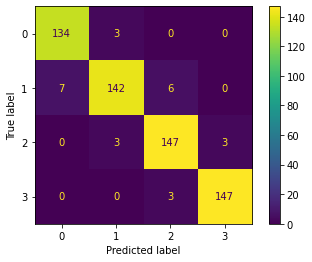

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

plot_confusion_matrix(model,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,Y_test_Predicted))
print('f1_score: ',f1_score(Y_test,Y_test_Predicted,average='weighted'))
print('Precision: ', precision_score(Y_test,Y_test_Predicted,average='weighted'))
print('Recall: ', recall_score(Y_test,Y_test_Predicted,average='weighted'))

Checking again by removing some columns

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_n.drop(['price_range','three_g', 'fc'],axis=1),df_n["price_range"],test_size=0.3,random_state=10)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,Y_train)
Y_test_Predicted=model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LGC result:
Accuracy:  0.9647058823529412
f1_score:  0.964608023244936
Precision:  0.9650822067208703
Recall:  0.9647058823529412


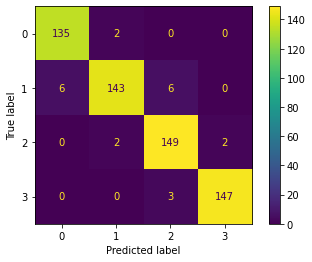

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

plot_confusion_matrix(model,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,Y_test_Predicted))
print('f1_score: ',f1_score(Y_test,Y_test_Predicted,average='weighted'))
print('Precision: ', precision_score(Y_test,Y_test_Predicted,average='weighted'))
print('Recall: ', recall_score(Y_test,Y_test_Predicted,average='weighted'))

The performance has increased slighlty after removing some fc and three_g

In [ ]:
df_n.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

checking again by removing some more columns 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_n.drop(['price_range','three_g', 'fc','four_g','pc'],axis=1),df_n["price_range"],test_size=0.3,random_state=10)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,Y_train)
Y_test_Predicted=model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LGC result:
Accuracy:  0.9680672268907563
f1_score:  0.9680752305807963
Precision:  0.9682526626371499
Recall:  0.9680672268907563


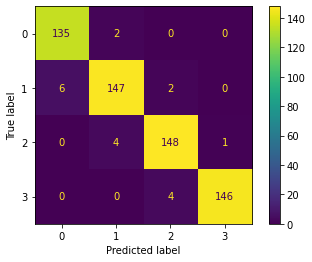

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

plot_confusion_matrix(model,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,Y_test_Predicted))
print('f1_score: ',f1_score(Y_test,Y_test_Predicted,average='weighted'))
print('Precision: ', precision_score(Y_test,Y_test_Predicted,average='weighted'))
print('Recall: ', recall_score(Y_test,Y_test_Predicted,average='weighted'))

The performance of the model has increased slightly 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_n.drop(['price_range','three_g', 'fc','px_height','sc_h','four_g','pc'],axis=1),df_n["price_range"],test_size=0.3,random_state=10)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,Y_train)
Y_test_Predicted=model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LGC result:
Accuracy:  0.9042016806722689
f1_score:  0.9039240832002722
Precision:  0.9052379281372509
Recall:  0.9042016806722689


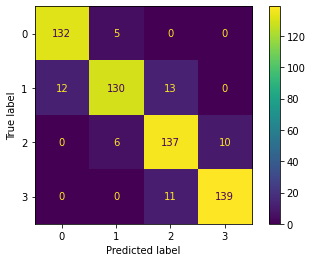

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

plot_confusion_matrix(model,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,Y_test_Predicted))
print('f1_score: ',f1_score(Y_test,Y_test_Predicted,average='weighted'))
print('Precision: ', precision_score(Y_test,Y_test_Predicted,average='weighted'))
print('Recall: ', recall_score(Y_test,Y_test_Predicted,average='weighted'))

When we tried removing some more colums the performance of the model is decreasing which means they are useful columns for our model

#Comparing different models

After feature extraction my colums are ['battery_power', 'blue', 'clock_speed', 'dual_sim','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time','touch_screen', 'wifi'] which sum up to 16 colums

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df_n.drop(['price_range','three_g', 'fc','four_g','pc'],axis=1),df_n["price_range"],test_size=0.3,random_state=10)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,Y_train)
Y_test_Predicted=model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LGC result:
Accuracy:  0.9680672268907563
f1_score:  0.9680752305807963
Precision:  0.9682526626371499
Recall:  0.9680672268907563


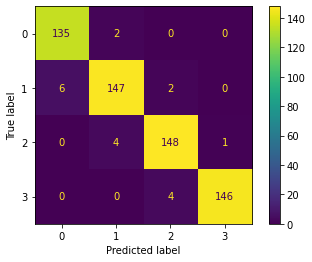

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

plot_confusion_matrix(model,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,Y_test_Predicted))
print('f1_score: ',f1_score(Y_test,Y_test_Predicted,average='weighted'))
print('Precision: ', precision_score(Y_test,Y_test_Predicted,average='weighted'))
print('Recall: ', recall_score(Y_test,Y_test_Predicted,average='weighted'))

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score
### BEGIN SOLUTION
accuracy_list,f1_score_list=[],[]
K=[2,3,4,5,6]
for i in K:
  model1=KNeighborsClassifier(n_neighbors=i)
  model1.fit(X_train,Y_train)
  Y_test_predicted=model1.predict(X_test)
  accuracy_list.append(accuracy_score(Y_test,Y_test_predicted))
  f1_score_list.append(f1_score(Y_test,Y_test_predicted,average='weighted'))







print (accuracy_list, f1_score_list)
### END SOLUTION

[0.4588235294117647, 0.4672268907563025, 0.519327731092437, 0.4957983193277311, 0.5109243697478991] [0.44570687410064036, 0.462453542437783, 0.5177964516554359, 0.49298899911765737, 0.5094362552224002]


Text(0.5, 1.0, 'Evaluation metrics vs. K')

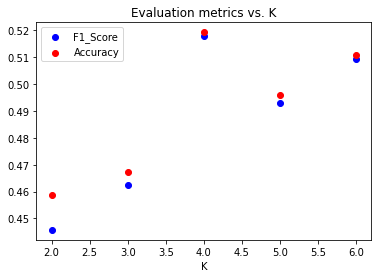

In [ ]:
#If you wrote the code correctly, running the following code, should create a plot of accuracy and f1-score of different models compared agains each other.
import matplotlib.pyplot as plt
plt.scatter(range(2,7),f1_score_list,label='F1_Score',color='blue')
plt.scatter(range(2,7),accuracy_list,label='Accuracy',color='red')
plt.xlabel('K')
plt.legend()
plt.title('Evaluation metrics vs. K')

From the above graph we can see that the performance of the model is best if the value of k is 4

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



model2 = KNeighborsClassifier(n_neighbors=4)
model2.fit(X_train,Y_train)



Y_testing_predicted=model2.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LGC result:
Accuracy:  0.519327731092437
f1_score:  0.5177964516554359
Precision:  0.5350266392214548
Recall:  0.519327731092437


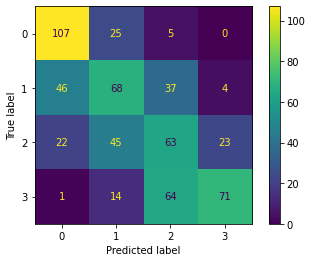

In [ ]:
plot_confusion_matrix(model2,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,Y_testing_predicted))
print('f1_score: ',f1_score(Y_test,Y_testing_predicted,average='weighted'))
print('Precision: ', precision_score(Y_test,Y_testing_predicted,average='weighted'))
print('Recall: ', recall_score(Y_test,Y_testing_predicted,average='weighted'))

We can see that the performance of the KNN model is not better than the performance of the logistic regression model. As the distribution of the data is uneven such that KNN couldn't choose right amount of clases. 

MLP

Testing MLP with different hyper parameters for best result

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(5,),max_iter=5000)
#Solver=lbfgs
MLP.fit(X_train, Y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,), max_iter=5000,
              solver='lbfgs')

In [ ]:
MLP.n_iter_

241

In [ ]:
MLP.coefs_

[array([[ 2.22083868e+01,  2.47588315e+01,  7.24407546e+00,
         -5.25791368e+00, -6.84212228e+00],
        [ 2.38906267e+00, -2.15825559e+00,  4.85251565e+00,
         -4.32149433e-02,  3.78649153e-01],
        [ 1.03514785e+00, -3.94604588e+00, -1.24246917e+00,
          2.92328638e-01, -2.01616893e-01],
        [-5.92071719e-01,  2.90876818e+00,  5.36891032e+00,
         -1.19805819e-01,  2.33880678e-01],
        [ 3.13962740e+00,  8.11208105e+00,  4.81117312e+00,
         -2.32958170e-02, -5.16339082e-01],
        [-1.29413795e+00,  6.46519047e+00,  3.42293480e+00,
          2.23762826e-01,  2.87542288e-01],
        [-4.60190184e+00, -1.17372731e+00, -6.22187451e+00,
          8.32301783e-01,  1.29203690e+00],
        [ 2.09486612e+00, -6.62193275e+00, -6.74964206e-01,
         -2.01208731e-01,  3.82953482e-02],
        [ 1.25011782e+01,  1.51852308e+01,  2.93947860e+00,
         -3.26492411e+00, -4.22300752e+00],
        [ 1.49945775e+01,  1.47905956e+01,  8.42161759e+00,
    

In [ ]:
MLP.intercepts_

[array([  2.34414455,   0.65513575, -10.12075008, -18.54112294,
         24.39894523]),
 array([ -2.28765048,  27.35141778,  -8.58754864, -16.63210729])]

In [ ]:
MLP_Predicted=MLP.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LGC result:
Accuracy:  0.9630252100840336
f1_score:  0.9630644794971172
Precision:  0.9632756758579883
Recall:  0.9630252100840336


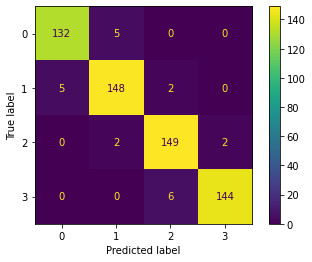

In [ ]:
plot_confusion_matrix(MLP,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,MLP_Predicted))
print('f1_score: ',f1_score(Y_test,MLP_Predicted,average='weighted'))
print('Precision: ', precision_score(Y_test,MLP_Predicted,average='weighted'))
print('Recall: ', recall_score(Y_test,MLP_Predicted,average='weighted'))

Testing different hyper parameters

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(activation='identity',solver='adam',hidden_layer_sizes=(20,),max_iter=5000)
#Solver=lbfgs
MLP.fit(X_train, Y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(20,), max_iter=5000)

In [ ]:
MLP_Predicted=MLP.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LGC result:
Accuracy:  0.9680672268907563
f1_score:  0.9680806763568912
Precision:  0.9681055614542287
Recall:  0.9680672268907563


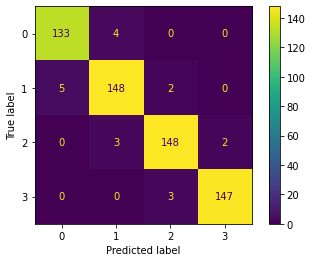

In [ ]:
plot_confusion_matrix(MLP,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,MLP_Predicted))
print('f1_score: ',f1_score(Y_test,MLP_Predicted,average='weighted'))
print('Precision: ', precision_score(Y_test,MLP_Predicted,average='weighted'))
print('Recall: ', recall_score(Y_test,MLP_Predicted,average='weighted'))

The performance of this model is better than the previous one

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(activation='relu',solver='adam',hidden_layer_sizes=(20,10),max_iter=5000)
#Solver=lbfgs
MLP.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=5000)

In [ ]:
MLP_Predicted=MLP.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LGC result:
Accuracy:  0.9109243697478991
f1_score:  0.9103581626705818
Precision:  0.9108383763074699
Recall:  0.9109243697478991


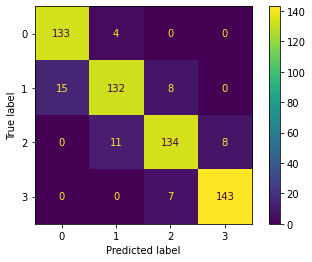

In [ ]:
plot_confusion_matrix(MLP,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,MLP_Predicted))
print('f1_score: ',f1_score(Y_test,MLP_Predicted,average='weighted'))
print('Precision: ', precision_score(Y_test,MLP_Predicted,average='weighted'))
print('Recall: ', recall_score(Y_test,MLP_Predicted,average='weighted'))

The performance of this model is not better than the previous one

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(activation='identity',solver='adam',hidden_layer_sizes=(40),max_iter=5000)
#Solver=lbfgs
MLP.fit(X_train, Y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=40, max_iter=5000)

In [ ]:
MLP_Predicted=MLP.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LGC result:
Accuracy:  0.9714285714285714
f1_score:  0.9714127460406886
Precision:  0.9714762362373558
Recall:  0.9714285714285714


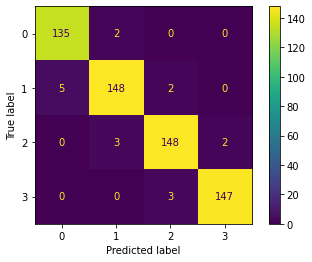

In [ ]:
plot_confusion_matrix(MLP,X_test,Y_test)

print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,MLP_Predicted))
print('f1_score: ',f1_score(Y_test,MLP_Predicted,average='weighted'))
print('Precision: ', precision_score(Y_test,MLP_Predicted,average='weighted'))
print('Recall: ', recall_score(Y_test,MLP_Predicted,average='weighted'))

This is the best model so far among all other models like Logistic Regression and KNN. As it has the best F1 Score,accuracy and the true positives, true negatives in the confusion matrix are more than other models. 

#Unsupervised + Supervised

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=05daa4a01f9ebc4283d70c6126d074f499b07bc54f2ea9034d1d492a51b212d3
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built minisom


In [ ]:
from minisom import MiniSom

In [ ]:
som_model=MiniSom(5,5,16,sigma=0.4, learning_rate=0.2)
som_model.train(np.array(X_train),50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 3.2312876417706273


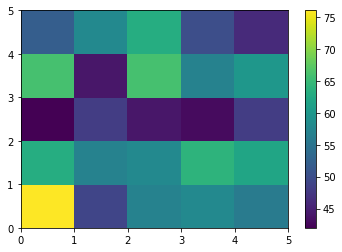

In [ ]:
# X_train=X_train.reset_index(drop=True)
# X_train
activation=som_model.activation_response(np.array(X_train))
import matplotlib.pyplot as plt
plt.pcolor(activation.T) 
plt.colorbar()
plt.show()

In [ ]:
X_training_qnt=som_model.quantization(np.array(X_train))

In [ ]:
from sklearn.linear_model import LogisticRegression
LGR_model_2nd_layer = MLPClassifier(activation='identity',solver='adam',hidden_layer_sizes=(40),max_iter=5000)
LGR_model_2nd_layer.fit(X_training_qnt,Y_train)
LGR_model_2nd_layer_prediction=LGR_model_2nd_layer.predict(som_model.quantization(np.array(X_test)))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,LGR_model_2nd_layer_prediction))
print('f1_score: ', f1_score(Y_test,LGR_model_2nd_layer_prediction,average='weighted'))
print('Precision: ', precision_score(Y_test,LGR_model_2nd_layer_prediction,average='weighted'))
print('Recall: ', recall_score(Y_test,LGR_model_2nd_layer_prediction,average='weighted'))

LGC result:
Accuracy:  0.3680672268907563
f1_score:  0.34637240329005153
Precision:  0.3416828734957927
Recall:  0.3680672268907563


Trying different cluster sizes and hyperparameters

In [ ]:
som_model=MiniSom(8,8,16,sigma=0.8, learning_rate=0.4)
som_model.train(np.array(X_train),50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 2.931860620753068


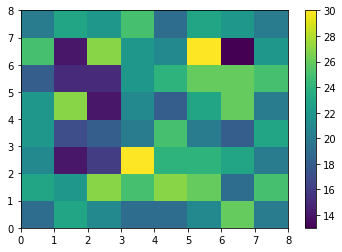

In [ ]:
# X_train=X_train.reset_index(drop=True)
# X_train
activation=som_model.activation_response(np.array(X_train))
import matplotlib.pyplot as plt
plt.pcolor(activation.T) 
plt.colorbar()
plt.show()

In [ ]:
X_training_qnt=som_model.quantization(np.array(X_train))

In [ ]:
from sklearn.linear_model import LogisticRegression
LGR_model_2nd_layer = MLPClassifier(activation='identity',solver='adam',hidden_layer_sizes=(40),max_iter=5000)
LGR_model_2nd_layer.fit(X_training_qnt,Y_train)
LGR_model_2nd_layer_prediction=LGR_model_2nd_layer.predict(som_model.quantization(np.array(X_test)))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,LGR_model_2nd_layer_prediction))
print('f1_score: ', f1_score(Y_test,LGR_model_2nd_layer_prediction,average='weighted'))
print('Precision: ', precision_score(Y_test,LGR_model_2nd_layer_prediction,average='weighted'))
print('Recall: ', recall_score(Y_test,LGR_model_2nd_layer_prediction,average='weighted'))

LGC result:
Accuracy:  0.38487394957983195
f1_score:  0.3763825707947002
Precision:  0.37436513465035137
Recall:  0.38487394957983195


The performance of this model is slightly better than the previous one 

In [ ]:
som_model=MiniSom(12,12,16,sigma=0.92, learning_rate=0.4)
som_model.train(np.array(X_train),50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 2.5685169269878037


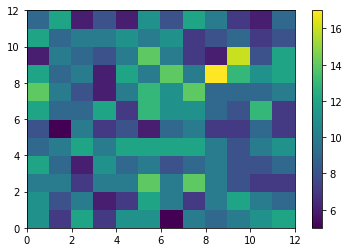

In [ ]:
# X_train=X_train.reset_index(drop=True)
# X_train
activation=som_model.activation_response(np.array(X_train))
import matplotlib.pyplot as plt
plt.pcolor(activation.T) 
plt.colorbar()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('LGC result:')
print('Accuracy: ',accuracy_score(Y_test,LGR_model_2nd_layer_prediction))
print('f1_score: ', f1_score(Y_test,LGR_model_2nd_layer_prediction,average='weighted'))
print('Precision: ', precision_score(Y_test,LGR_model_2nd_layer_prediction,average='weighted'))
print('Recall: ', recall_score(Y_test,LGR_model_2nd_layer_prediction,average='weighted'))

LGC result:
Accuracy:  0.38487394957983195
f1_score:  0.3763825707947002
Precision:  0.37436513465035137
Recall:  0.38487394957983195


The performance of the model is no longer increasing which means I have to stop trying bigger hyperparameters

#Conclusion and result justification

After analyzing the data and running multiple models on a variety of feature subsets, I have concluded that the best model for this dataset is the MLP model with hyperparameters (activation='identity',solver='adam',hidden_layer_sizes=(40),max_iter=5000).The features selected are 'battery_power', 'blue', 'clock_speed', 'dual_sim','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time','touch_screen', 'wifi'. The MLP model was able to provide a greater accuracy score and F1 score than the other models tested, as well as more true positive values than other models. But the Unsupervised+supervised model couldn't deliver good performance as Unsupervised model couldn't extract useful clusters from the dataset and because of that the supervised model was unable to train the model well. Overall, from this course I have learned about the different types of machine learning algorithms and how to apply them to various types of data.I have also learned about the importance of feature engineering and how to select the best features and use them to build powerful models. Additionally, I have learned about the different evaluation metrics used to measure model performance and how to interpret the results. Finally, I have gained an understanding of the AI and ML tools in model generation.